#### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split


#### Data Processing 

In [4]:
# importing database and converting to a pandas dataframe
data_set = pd.read_csv("car data.csv")
# sampling the first 5 rows of the data base 
data_set.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#  counting the number of data points in the data set
data_set.shape
# there are 301 rows and 9 columns

(301, 9)

In [7]:
# fetching information about the data set
data_set.info()
# no values are missing hence data cleaning is not necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# even though we know there are no missing values, we can check it using the function
data_set.isnull().sum() 
# No values are missing (confirmed)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# dinstinguishing categorical data from the "Fuel type", "Seller Type" and "Transmission" data columns
print(data_set.Fuel_Type.value_counts())
print(data_set.Seller_Type.value_counts())
print(data_set.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#### Encoding data

In [10]:
# the model does not take strings into consideration 
# converting all strings in numbers 
# encoding "Fuel_Type" colunmn
data_set.replace({'Fuel_Type': {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}},inplace = True)

# encoding "Seller_Type" colunmn
data_set.replace({'Seller_Type': {'Dealer' : 0, 'Individual' : 1}},inplace = True)

# encoding "Transmission" colunmn
data_set.replace({'Transmission': {'Manual' : 0, 'Automatic' : 1}},inplace = True)

data_set.head()
 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


#### Splitting data into testing and training sets 

In [13]:
X = data_set.drop(['Car_Name', 'Selling_Price'], axis = 1)
Y = data_set['Selling_Price']

In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#### Splitting the training and testing data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state = 2)

#### Training the model
1) Linear regression

In [18]:
linear_reg = LinearRegression()

In [19]:
linear_reg.fit(X_train,Y_train)

LinearRegression()

#### Model error evaluation

In [21]:
# predicting on the training data set
train_data_prediction = linear_reg.predict(X_train)

In [28]:
# R squared error implementation for training data set
error_metric_training = metrics.r2_score(Y_train, train_data_prediction)
print(f"R squared error: {error_metric_training}")

R squared error: 0.8799451660493709


#### Visualising the difference between the actual price and the predicted price for the training data set

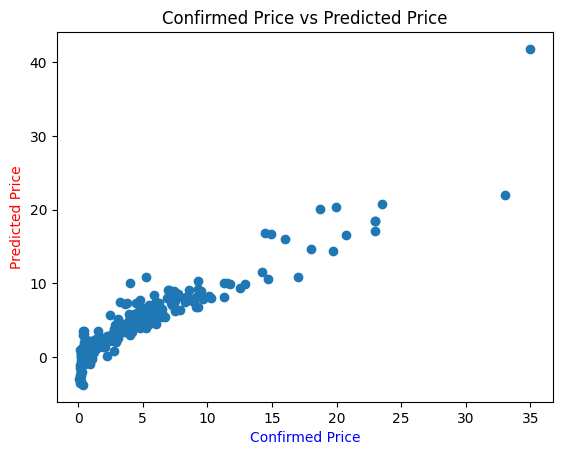

In [29]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Confirmed Price", c ="blue")
plt.ylabel("Predicted Price", c = "red")
plt.title("Confirmed Price vs Predicted Price for training data set")
plt.show() 

In [26]:
# The values predicted by the model are very close to the actual value of the cars

# predicting on the testing data set
test_data_prediction = linear_reg.predict(X_test)

In [30]:
# R squared error implementation for training data set
error_metric_testing = metrics.r2_score(Y_test, test_data_prediction)
print(f"R squared error: {error_metric_testing}")

R squared error: 0.8365766715027525


#### Visualising the difference between the actual price and the predicted price for the testing data set

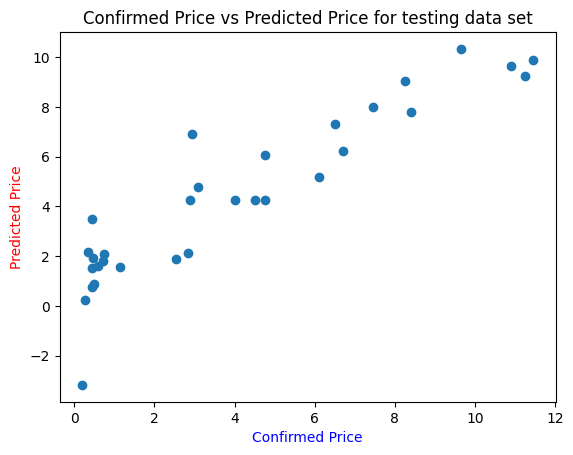

In [31]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Confirmed Price", c ="blue")
plt.ylabel("Predicted Price", c = "red")
plt.title("Confirmed Price vs Predicted Price for testing data set")
plt.show() 

2. Lasso Regression

In [32]:
lasso_reg = Lasso()

In [33]:
lasso_reg.fit(X_train,Y_train)

Lasso()

#### Model error evaluation

In [34]:
# predicting on the training data set
train_data_prediction = lasso_reg.predict(X_train)

In [36]:
# R squared error implementation for training data set
error_metric_training = metrics.r2_score(Y_train, train_data_prediction)
print(f"R squared error: {error_metric_training}")

R squared error: 0.8427856123435794


#### Visualising the difference between the actual price and the predicted price for the training data set

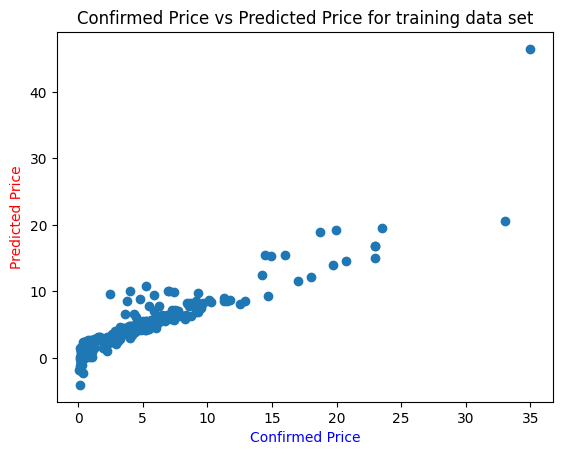

In [39]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel("Confirmed Price", c ="blue")
plt.ylabel("Predicted Price", c = "red")
plt.title("Confirmed Price vs Predicted Price for training data set")
plt.show() 

In [40]:
# The values predicted by the model are very close to the actual value of the cars
# this model does seem to give a better prediction than the linear regression model

# predicting on the testing data set
test_data_prediction = lasso_reg.predict(X_test)

In [41]:
# R squared error implementation for training data set
error_metric_testing = metrics.r2_score(Y_test, test_data_prediction)
print(f"R squared error: {error_metric_testing}")

R squared error: 0.8709167941173195


#### Visualising the difference between the actual price and the predicted price for the testing data set

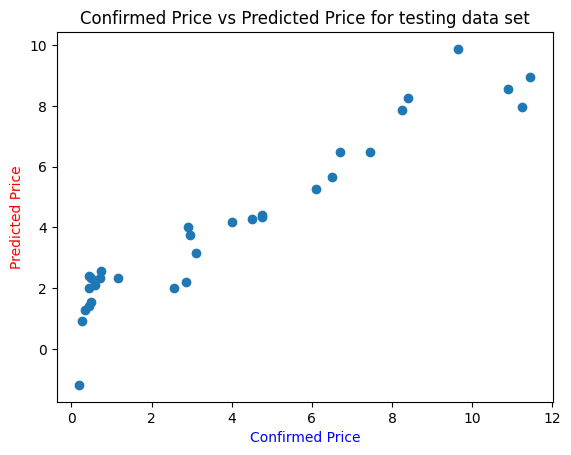

In [44]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Confirmed Price", c ="blue")
plt.ylabel("Predicted Price", c = "red")
plt.title("Confirmed Price vs Predicted Price for testing data set")
plt.show() 